In [95]:
import pandas as pd

df = pd.read_excel('D:/Projects/power_analysis/data/raw/panel_data.xlsx',usecols = ['cid','year','power_exporter_norm','power_importer_norm','dependence_exporter_norm','dependence_importer_norm','GDP per capita (constant 2005 US$)','eci.value'])

df = df.dropna()

In [100]:
df.corr(method='pearson', min_periods=1)

,year,eci.value,power_exporter_norm,power_importer_norm,dependence_importer_norm,dependence_exporter_norm,GDP per capita (constant 2005 US$)
year,1.000000,-0.043694,-0.022596,-0.017262,-0.071600,-0.037066,0.163571
eci.value,-0.043694,1.000000,0.479363,0.398896,-0.036356,-0.120689,0.635770
power_exporter_norm,-0.022596,0.479363,1.000000,0.919351,-0.180338,-0.135705,0.397956
power_importer_norm,-0.017262,0.398896,0.919351,1.000000,-0.187450,-0.141762,0.356770
dependence_importer_norm,-0.071600,-0.036356,-0.180338,-0.187450,1.000000,0.710381,-0.053700
dependence_exporter_norm,-0.037066,-0.120689,-0.135705,-0.141762,0.710381,1.000000,-0.133200
GDP per capita (constant 2005 US$),0.163571,0.635770,0.397956,0.356770,-0.053700,-0.133200,1.000000


In [103]:
df = df.set_index(['cid','year'])

In [115]:
df = df.reset_index()

In [143]:
def get_lagged_columns(df_ori,columns_name,lag = 1):
    
    df = df_ori.copy()
    
    df['year lag'] = df['year'].apply(lambda x:x-lag)

    df_lag = df[['cid','year lag',columns_name]]

    df_lag.columns = ['cid','year',columns_name + ' lag' + str(lag)]

    df = pd.merge(df,df_lag,on = ['cid','year'])

    del df['year lag']
    return df

In [61]:
df_china = df[df['cid'] == 'chn']

In [153]:
for name in df.columns[3:]:
    df[name] = df[name].apply(lambda x:math.log(x))

d:\tools\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
df.to_csv('D:\Projects\power_analysis\data\processed\pd_stata.csv')

In [82]:
df_china.index = df_china['year']

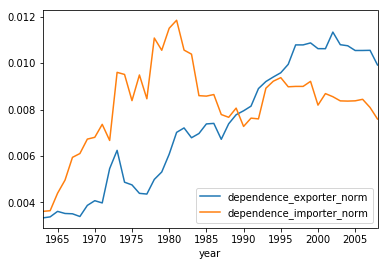

In [83]:
df_china[['dependence_exporter_norm',
          'dependence_importer_norm']].plot()

In [93]:
df = df[df['year'] != 1997]
#for cid,group in grouped:
def check_group_same(group):
    df_coun = group[['power_exporter_norm','power_importer_norm',
                     'dependence_exporter_norm','dependence_importer_norm']].pct_change()
    for col_name in df_coun:
        if 0 in list(df_coun[col_name]):
            return list(group[df_coun[col_name] == 0]['year'])
            
    return []

df.groupby('cid').apply(check_group_same)

cid
afg    []
ago    []
alb    []
are    []
arg    []
aus    []
aut    []
bdi    []
ben    []
bfa    []
bgd    []
bgr    []
bol    []
bra    []
caf    []
can    []
che    []
chl    []
chn    []
civ    []
cmr    []
cog    []
col    []
cri    []
cub    []
deu    []
dnk    []
dom    []
dza    []
ecu    []
       ..
phl    []
png    []
pol    []
prk    []
prt    []
pry    []
rwa    []
sau    []
sdn    []
sen    []
sgp    []
sle    []
slv    []
som    []
swe    []
syr    []
tcd    []
tgo    []
tha    []
tun    []
tur    []
tza    []
uga    []
ury    []
usa    []
ven    []
vnm    []
zaf    []
zmb    []
zwe    []
Length: 114, dtype: object

In [159]:
for name in df.columns[3:]:
    df[name] = df[name].apply(lambda x:math.exp(x))

d:\tools\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
for name in df.columns[2:]:
    new_name = 'ln_'+name
    df[new_name] = df[name].apply(lambda x:math.log(x))

ValueError: math domain error

In [166]:
df['ln_GDP'] = df['GDP per capita (constant 2005 US$)+1'].apply(lambda x:math.log(x))

In [168]:
df.to_csv('D:\Projects\power_analysis\data\processed\pd_stata.csv')

In [171]:
df1 = pd.read_excel('D:/Projects/power_analysis/data/raw/panel_data.xlsx',usecols = ['cid','year','power_exporter','power_importer ','dependence_exporter','dependence_importer'])

In [172]:
df2 = pd.read_csv('D:\Projects\power_analysis\data\processed\pd_stata.csv')

In [174]:
del df2['Unnamed: 0']

In [176]:
df3 = pd.merge(df1,df2,on = ['cid','year'])

In [177]:
df3

,cid,year,power_exporter,power_importer,dependence_importer,dependence_exporter,eci.value,power_exporter_norm,power_importer_norm,dependence_importer_norm,dependence_exporter_norm,GDP per capita (constant 2005 US$),GDP per capita (constant 2005 US$)+1,ln_eci.value,ln_power_exporter_norm,ln_power_importer_norm,ln_dependence_importer_norm,ln_dependence_exporter_norm,ln_GDP
0,alb,1980,0.000264,0.000243,0.057265,0.050105,0.607415,0.000073,7.749248e-05,0.005573,0.005194,1792.818658,1858.232309,1.835680,1.000073,1.000077,1.005589,1.005208,7.527381
1,alb,1981,0.000126,0.000215,0.067646,0.051523,0.192235,0.000036,6.956450e-05,0.006557,0.005345,1858.232309,1873.020866,1.211955,1.000036,1.000070,1.006579,1.005359,7.535308
2,alb,1982,0.000116,0.000425,0.084020,0.050512,0.237749,0.000033,1.409274e-04,0.008160,0.005265,1873.020866,1853.975950,1.268391,1.000033,1.000141,1.008194,1.005279,7.525088
3,alb,1983,0.000154,0.000188,0.062237,0.039382,0.427803,0.000049,6.966986e-05,0.006184,0.004152,1853.975950,1792.655747,1.533884,1.000049,1.000070,1.006203,1.004161,7.491453
4,alb,1984,0.000060,0.000052,0.084829,0.043689,0.247547,0.000019,1.896289e-05,0.008454,0.004650,1792.655747,1787.446373,1.280880,1.000019,1.000019,1.008490,1.004661,7.488543
5,alb,1985,0.000053,0.000065,0.083872,0.058505,0.162175,0.000016,2.270784e-05,0.008285,0.006133,1787.446373,1852.056402,1.176066,1.000016,1.000023,1.008320,1.006152,7.524052
6,alb,1986,0.000125,0.000047,0.079810,0.047481,0.076155,0.000036,1.587742e-05,0.007685,0.004929,1852.056402,1801.134179,1.079130,1.000036,1.000016,1.007715,1.004942,7.496172
7,alb,1987,0.000090,0.000041,0.074736,0.041625,0.251822,0.000026,1.415496e-05,0.007190,0.004379,1801.134179,1742.371774,1.286367,1.000026,1.000014,1.007216,1.004388,7.463003
8,alb,1988,0.000089,0.000066,0.068025,0.050361,-0.119984,0.000025,2.174848e-05,0.006537,0.005264,1742.371774,1863.006927,0.886935,1.000025,1.000022,1.006558,1.005278,7.529947
9,alb,1989,0.000124,0.000086,0.072856,0.046837,-0.126860,0.000035,2.957520e-05,0.007106,0.005022,1863.006927,1654.575476,0.880857,1.000035,1.000030,1.007131,1.005035,7.411300


In [179]:
df3.columns[2:6]

Index([u'power_exporter', u'power_importer ', u'dependence_importer',
       u'dependence_exporter'],
      dtype='object')

In [180]:
for name in df3.columns[2:6]:
    new_name = 'ln_'+name
    df3[new_name] = df3[name].apply(lambda x:math.log(x))

In [182]:
df3.to_csv('D:\Projects\power_analysis\data\processed\pd_stata.csv',index=False)